### Brief Insight about Medicare :

*  Medicare is the federal government plan in the U.S. for paying certain hospital and medical expenses for elderly persons qualifying under the plan


* It is available for people age 65 or older, younger people with disabilities and people with End Stage Renal Disease (permanent kidney failure requiring dialysis or transplant). Medicare has two parts, Part A (Hospital Insurance) and Part B (Medicare Insurance). You are eligible for premium-free Part A if you are age 65 or older and you or your spouse worked and paid Medicare taxes for at least 10 years.


* Medicare Part A (Hospital Insurance): Part A covers inpatient hospital stays, care in a skilled nursing facility, hospice care, and some home health care.


* Medicare Part B (Medical Insurance): Part B covers certain doctors' services, outpatient care, medical supplies, and preventive services

* Medicare Part D (prescription drug coverage): Helps cover the cost of prescription drugs (including many recommended shots or vaccines).

### Aim: To Predict Average Medicare Allowed Amount Avg_Mdcr_Alowd_Amt

* Average of the Medicare allowed amount for the service. Medicare allowed amounts includes the amount Medicare pays, the deductible and coinsurance amounts that the beneficiary is responsible for paying, and any amounts that a third party is responsible for paying

In [2]:
# Importing the necessary tools for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score

In [3]:
import io
%cd "C:\Users\saich\Downloads"

C:\Users\saich\Downloads


In [4]:
medicaredata = pd.read_csv("Medicare.csv",low_memory=False)

In [5]:
# We can observe the dataset by checking a few of the rows using the head() method, which returns the first five records 
# from the dataset.
medicaredata.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,National,NaN,National,0003M,"Liver disease, ten biochemical assays (alt, a2...",N,O,12,41,42,42,$680.55,$438.21,$438.21,$447.51
1,National,NaN,National,0005U,Test for detecting genes associated with prost...,N,O,1,539,540,540,$795.00,$744.80,$744.80,$744.80
2,National,NaN,National,00100,Anesthesia for procedure on salivary gland wit...,N,F,"9,574","8,232","12,019","12,016","$1,959.51",$237.04,$187.54,$186.43
3,National,NaN,National,00100,Anesthesia for procedure on salivary gland wit...,N,O,91,59,99,99,"$1,409.59",$170.33,$134.02,$129.78
4,National,NaN,National,00102,Anesthesia for procedure to repair lip defect ...,N,F,63,48,70,70,"$1,210.95",$165.06,$129.08,$128.45


In [6]:
# info() method shows some of the characteristics of the data such as Column Name, No. of non-null values of our columns, 
#Dtype of the data, and Memory Usage.
medicaredata.info()
# Rndrng_Prvdr_Geo_Cd variable has Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273211 entries, 0 to 273210
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Rndrng_Prvdr_Geo_Lvl   273211 non-null  object
 1   Rndrng_Prvdr_Geo_Cd    260217 non-null  object
 2   Rndrng_Prvdr_Geo_Desc  273211 non-null  object
 3   HCPCS_Cd               273211 non-null  object
 4   HCPCS_Desc             273211 non-null  object
 5   HCPCS_Drug_Ind         273211 non-null  object
 6   Place_Of_Srvc          273211 non-null  object
 7   Tot_Rndrng_Prvdrs      273211 non-null  object
 8   Tot_Benes              273211 non-null  object
 9   Tot_Srvcs              273211 non-null  object
 10  Tot_Bene_Day_Srvcs     273211 non-null  object
 11  Avg_Sbmtd_Chrg         273211 non-null  object
 12  Avg_Mdcr_Alowd_Amt     273211 non-null  object
 13  Avg_Mdcr_Pymt_Amt      273211 non-null  object
 14  Avg_Mdcr_Stdzd_Amt     273211 non-null  object
dtype

In [7]:
medicaredata.isnull().sum().sort_values(ascending=False)

Rndrng_Prvdr_Geo_Cd      12994
Rndrng_Prvdr_Geo_Lvl         0
Rndrng_Prvdr_Geo_Desc        0
HCPCS_Cd                     0
HCPCS_Desc                   0
HCPCS_Drug_Ind               0
Place_Of_Srvc                0
Tot_Rndrng_Prvdrs            0
Tot_Benes                    0
Tot_Srvcs                    0
Tot_Bene_Day_Srvcs           0
Avg_Sbmtd_Chrg               0
Avg_Mdcr_Alowd_Amt           0
Avg_Mdcr_Pymt_Amt            0
Avg_Mdcr_Stdzd_Amt           0
dtype: int64

In [8]:
# Since the Missing Values are larger in number lets replace it with the word "missing"
dataset = medicaredata.fillna("missing")

In [9]:
numericint = medicaredata[['Tot_Rndrng_Prvdrs','Tot_Benes','Tot_Bene_Day_Srvcs']]

In [10]:
numericfloat = medicaredata[['Tot_Srvcs','Avg_Sbmtd_Chrg','Avg_Mdcr_Alowd_Amt',
                             'Avg_Mdcr_Pymt_Amt','Avg_Mdcr_Stdzd_Amt']]

In [11]:
objectcols = medicaredata[['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Cd', 'Rndrng_Prvdr_Geo_Desc',
                      'HCPCS_Cd', 'HCPCS_Desc', 'HCPCS_Drug_Ind', 'Place_Of_Srvc']]

In [12]:
objectcols_text = medicaredata[[ 'HCPCS_Desc']]
# As the dataset has a text column, I saved it in a separate dataframe for later use.

### Cleaning the data :
#### 1.) numericint :

In [13]:
numericint.Tot_Rndrng_Prvdrs = numericint.Tot_Rndrng_Prvdrs.str.replace(",","")

C:\Users\saich\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
numericint.Tot_Benes = numericint.Tot_Benes.str.replace(",","")

In [15]:
numericint.Tot_Bene_Day_Srvcs = numericint.Tot_Bene_Day_Srvcs.str.replace(",","")

In [16]:
numericint = numericint.astype('int32')

#### 2.) numericfloat :

In [17]:
numericfloat.Tot_Srvcs = numericfloat.Tot_Srvcs.str.replace(",","")

In [18]:
numericfloat.Tot_Srvcs = numericfloat.Tot_Srvcs.str.replace("$","")

C:\Users\saich\AppData\Local\Temp/ipykernel_13116/4225982932.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Tot_Srvcs = numericfloat.Tot_Srvcs.str.replace("$","")


In [19]:
numericfloat.Avg_Sbmtd_Chrg = numericfloat.Avg_Sbmtd_Chrg.str.replace(",","")

In [20]:
numericfloat.Avg_Sbmtd_Chrg = numericfloat.Avg_Sbmtd_Chrg.str.replace("$","")

C:\Users\saich\AppData\Local\Temp/ipykernel_13116/831516647.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Avg_Sbmtd_Chrg = numericfloat.Avg_Sbmtd_Chrg.str.replace("$","")


In [21]:
numericfloat.Avg_Mdcr_Alowd_Amt = numericfloat.Avg_Mdcr_Alowd_Amt.str.replace(",","")

In [22]:
numericfloat.Avg_Mdcr_Alowd_Amt = numericfloat.Avg_Mdcr_Alowd_Amt.str.replace("$","")

C:\Users\saich\AppData\Local\Temp/ipykernel_13116/116582745.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Avg_Mdcr_Alowd_Amt = numericfloat.Avg_Mdcr_Alowd_Amt.str.replace("$","")


In [23]:
numericfloat.Avg_Mdcr_Pymt_Amt = numericfloat.Avg_Mdcr_Pymt_Amt.str.replace(",","")

In [24]:
numericfloat.Avg_Mdcr_Pymt_Amt = numericfloat.Avg_Mdcr_Pymt_Amt.str.replace("$","")

C:\Users\saich\AppData\Local\Temp/ipykernel_13116/1361927190.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Avg_Mdcr_Pymt_Amt = numericfloat.Avg_Mdcr_Pymt_Amt.str.replace("$","")


In [25]:
numericfloat.Avg_Mdcr_Stdzd_Amt = numericfloat.Avg_Mdcr_Stdzd_Amt.str.replace(",","")

In [26]:
numericfloat.Avg_Mdcr_Stdzd_Amt = numericfloat.Avg_Mdcr_Stdzd_Amt.str.replace("$","")

C:\Users\saich\AppData\Local\Temp/ipykernel_13116/193031717.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numericfloat.Avg_Mdcr_Stdzd_Amt = numericfloat.Avg_Mdcr_Stdzd_Amt.str.replace("$","")


In [27]:
numericfloat = numericfloat.astype('float64')

In [28]:
# Lets Combine all the Numeric columns to gether
numcols = pd.concat([numericint,numericfloat],axis=1)

### Finding the Correlation between variables:

In [29]:
import seaborn as sns

<AxesSubplot:>

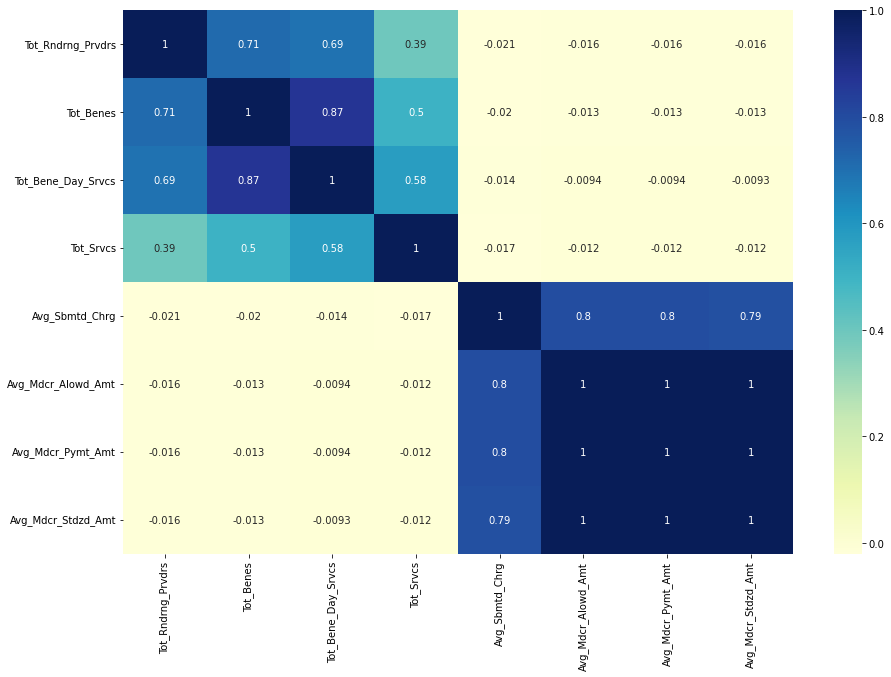

In [30]:
# setting the dimensions of the figure
plt.figure(figsize=(15,10))  

# syntax = sns.heatmap(dataset.corr(),annot=True)
sns.heatmap(numcols.corr(),annot=True,cmap="YlGnBu")

### Combining all dataframes into a single data frame :

In [31]:
combinedf = pd.concat([objectcols,numcols],axis=1)

In [32]:
combinedf.shape

(273211, 15)

In [33]:
combinedf.describe()
# For Target Variable - When mean > median then the data is said to be positively skewed.
# Therefore "Avg_Mdcr_Alowd_Amt" is Positively Skewed. It can be corrected by Logarithmic Tranformation

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Bene_Day_Srvcs,Tot_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
count,273211.000000,2.732110e+05,2.732110e+05,2.732110e+05,273211.000000,273211.000000,273211.000000,273211.000000
mean,267.382433,5.582857e+03,1.096098e+04,2.372581e+04,1251.172998,295.727755,235.197030,234.769057
std,3149.869990,1.180026e+05,3.415823e+05,6.566590e+05,2316.386139,756.843036,604.144301,607.611636
min,1.000000,1.100000e+01,1.100000e+01,1.100000e+01,0.010000,0.010000,0.000000,0.010000
25%,12.000000,3.100000e+01,3.800000e+01,4.000000e+01,128.180000,37.240000,29.130000,29.230000
50%,30.000000,1.090000e+02,1.440000e+02,1.620000e+02,446.530000,117.310000,91.140000,91.380000
75%,98.000000,6.060000e+02,8.505000e+02,1.083000e+03,1570.305000,335.415000,266.860000,267.500000
max,564937.000000,2.359469e+07,9.799789e+07,1.345132e+08,93181.060000,62142.820000,49501.500000,49501.500000


## 'Skewness' and 'Kurtosis' - Metrics for understanding the Data distribution : 
### Skewness : It is the Measure of Assymetry of the Curve 
* If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
* If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
* If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.
### Kurtosis : The height of the Distribution Curve with respect to Normal Distribution 
* It tells us if the data is heavy or light tailed relative to a normal distribution.
* Kurtosis range from -10 to +10.

<AxesSubplot:ylabel='Density'>

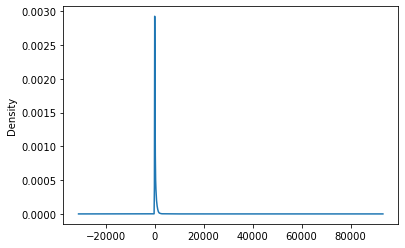

In [34]:
combinedf.Avg_Mdcr_Alowd_Amt.plot(kind="density")

In [35]:
# Impact before Logarithmic Transformation
print(combinedf.Avg_Mdcr_Alowd_Amt.skew())
print(combinedf.Avg_Mdcr_Alowd_Amt.kurt())

29.39997944209243
1541.565204747929


<AxesSubplot:ylabel='Density'>

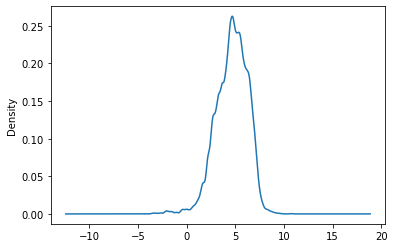

In [36]:
np.log(combinedf.Avg_Mdcr_Alowd_Amt).plot(kind="density")

In [37]:
# Impact of Logarithmic Transformation
print(np.log(combinedf.Avg_Mdcr_Alowd_Amt).skew())
print(np.log(combinedf.Avg_Mdcr_Alowd_Amt).kurt())

-0.6170474861667171
1.102794847571535


# Inferential Statistics:
## Two Sample Indepedent T test: 
It is a method used to test whether the unknown population means of two groups are equal or not.
* Dependent Variable Must Constinuous and close to Normal Distribution
* Independent Variable should be Categorical with exactly 2 levels

In [38]:
from scipy.stats import ttest_ind

### Test Null : There is Significant difference in the average of Avg_Mdcr_Alowd_Amt and HCPCS_Drug_Ind

In [39]:
combinedf.Avg_Mdcr_Alowd_Amt.groupby(combinedf.HCPCS_Drug_Ind).mean()

HCPCS_Drug_Ind
N    299.823297
Y    210.379081
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

In [40]:
combinedf.Avg_Mdcr_Alowd_Amt.groupby(combinedf.HCPCS_Drug_Ind).var()

HCPCS_Drug_Ind
N    3.418712e+05
Y    5.378247e+06
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

In [41]:
no = combinedf[combinedf.HCPCS_Drug_Ind=="N"]
yes = combinedf[combinedf.HCPCS_Drug_Ind=="Y"]

In [42]:
ttest_ind(no.Avg_Mdcr_Alowd_Amt,yes.Avg_Mdcr_Alowd_Amt,equal_var=False)
# since p value is less than 0.05 Fail to reject Null Hypothesis

Ttest_indResult(statistic=4.307241404851327, pvalue=1.66556450854813e-05)

### Test Null : There is Significant difference in the average of Avg_Mdcr_Alowd_Amt and Rndrng_Prvdr_Geo_Lvl

In [43]:
combinedf.Avg_Mdcr_Alowd_Amt.groupby(combinedf.Rndrng_Prvdr_Geo_Lvl).std()

Rndrng_Prvdr_Geo_Lvl
National    853.693340
State       751.308735
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

In [44]:
combinedf.Avg_Mdcr_Alowd_Amt.groupby(combinedf.Rndrng_Prvdr_Geo_Lvl).mean()

Rndrng_Prvdr_Geo_Lvl
National    399.113288
State       290.565173
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

In [45]:
combinedf.Avg_Mdcr_Alowd_Amt.groupby(combinedf.Rndrng_Prvdr_Geo_Lvl).var()

Rndrng_Prvdr_Geo_Lvl
National    728792.319460
State       564464.814708
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

In [46]:
National = combinedf[combinedf.Rndrng_Prvdr_Geo_Lvl=="National"]
State = combinedf[combinedf.Rndrng_Prvdr_Geo_Lvl=="State"]

In [47]:
ttest_ind(National.Avg_Mdcr_Alowd_Amt,State.Avg_Mdcr_Alowd_Amt,equal_var=False)
# since p value is less than 0.05 Fail to reject Null Hypothesis

Ttest_indResult(statistic=14.221709397038724, pvalue=1.3940585031939975e-45)

### Test Null : There is Significant difference in the average of Avg_Mdcr_Alowd_Amt and Place_Of_Srvc

In [48]:
combinedf.Avg_Mdcr_Alowd_Amt.groupby(combinedf.Place_Of_Srvc).mean()

Place_Of_Srvc
F    367.527913
O    209.184009
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

In [49]:
combinedf.Avg_Mdcr_Alowd_Amt.groupby(combinedf.Place_Of_Srvc).var()

Place_Of_Srvc
F    242447.738764
O    957313.943421
Name: Avg_Mdcr_Alowd_Amt, dtype: float64

In [50]:
Fy = combinedf[combinedf.Place_Of_Srvc=="F"]
NFy = combinedf[combinedf.Place_Of_Srvc=="O"]

In [51]:
ttest_ind(Fy.Avg_Mdcr_Alowd_Amt,NFy.Avg_Mdcr_Alowd_Amt,equal_var=True)
# since p value is less than 0.05 Fail to reject Null Hypothesis

Ttest_indResult(statistic=54.738325955654474, pvalue=0.0)

## Chi Square Test of Indepedence : 
It is a method of finding if there is any Association between 2 varibles

* The Variables are Categorical

In [52]:
from scipy.stats import chi2_contingency

### Test Null: There is No Association between Rndrng_Prvdr_Geo_Lvl and HCPCS_Drug_Ind


In [53]:
pd.crosstab(combinedf.Rndrng_Prvdr_Geo_Lvl,combinedf.HCPCS_Drug_Ind)

HCPCS_Drug_Ind,N,Y
Rndrng_Prvdr_Geo_Lvl,,
National,12421,573
State,248280,11937


In [54]:
chi2_contingency(pd.crosstab(combinedf.Rndrng_Prvdr_Geo_Lvl,combinedf.HCPCS_Drug_Ind))
# Since p-value > 0.05 Reject Null

(0.8532253009977158,
 0.3556415141576682,
 1,
 array([[ 12399.02051528,    594.97948472],
        [248301.97948472,  11915.02051528]]))

In [55]:
# Test Null: There is No Association between Rndrng_Prvdr_Geo_Lvl and Place_Of_Srvc

In [56]:
pd.crosstab(combinedf.Rndrng_Prvdr_Geo_Lvl,combinedf.Place_Of_Srvc)

Place_Of_Srvc,F,O
Rndrng_Prvdr_Geo_Lvl,,
National,7042,5952
State,142283,117934


In [57]:
chi2_contingency(pd.crosstab(combinedf.Rndrng_Prvdr_Geo_Lvl,combinedf.Place_Of_Srvc))
# Since p-value > 0.05 Reject Null

(1.152041443360135,
 0.2831222114825138,
 1,
 array([[  7101.94336978,   5892.05663022],
        [142223.05663022, 117993.94336978]]))

### Test Null: There is No Association between HCPCS_Drug_Ind and Place_Of_Srvc

In [58]:
pd.crosstab(combinedf.HCPCS_Drug_Ind,combinedf.Place_Of_Srvc)

Place_Of_Srvc,F,O
HCPCS_Drug_Ind,,
N,148877,111824
Y,448,12062


In [59]:
chi2_contingency(pd.crosstab(combinedf.HCPCS_Drug_Ind,combinedf.Place_Of_Srvc))
# Since p-value < 0.05 Reject Null

(13797.277058344007,
 0.0,
 1,
 array([[142487.58953702, 118213.41046298],
        [  6837.41046298,   5672.58953702]]))

## Data Transformation :
### Label Encoding Object Columns :

In [60]:
 from sklearn.preprocessing import LabelEncoder

In [61]:
le = LabelEncoder()

In [62]:
objectencoded = objectcols.apply(le.fit_transform)

In [63]:
combinedf.shape

(273211, 15)

In [64]:
combinedf = pd.concat([objectencoded,numcols],axis=1)

# Model Building and Idealogy : 
As the Dependent Variable is "Continuos" Let us build Regression Models on both with and without Logarithmic Transformation of variable "y".
* **Case1 :**
Build Regression Models on Transformed Data 
* **Case2 :**
 As the dataset has a text column, we'll divide it down into sentences and then words, tokenize with count vectorizer, then create regression models with 300 important features.

**Conclusion:** 

* Building a Model Comparision report to find the best model


In [65]:
# Since there is high collinearity between 'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt' and 'Avg_Mdcr_Allowd_Amt'
# I have dropped variables Avg_Mdcr_Pymt_Amt and 'Avg_Mdcr_Stdzd_Amt'
y = combinedf.Avg_Mdcr_Alowd_Amt
X = combinedf.drop(['Avg_Mdcr_Pymt_Amt','Avg_Mdcr_Stdzd_Amt','Avg_Mdcr_Alowd_Amt'],axis=1)

#  Case1: 
### Linear Regression : without Logarithmic Transformation of "y" 

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr = LinearRegression()

In [68]:
lrmodel  = lr.fit(X,y)

In [69]:
lrmodel.score(X,y)

0.6443486998845617

In [70]:
cross_val_score(lrmodel,X,y)

array([0.65592649, 0.64227398, 0.68869875, 0.60885133, 0.59607677])

In [71]:
np.mean([0.65592649, 0.64227398, 0.68869875, 0.60885133, 0.59607677])

0.6383654639999999

In [72]:
lrpredict = lrmodel.predict(X)

In [73]:
lr_residuals = y - lrpredict

In [74]:
np.sqrt(np.mean(lr_residuals)**2)

1.3941067403429016e-13

### Linear Regression : with Logarithmic Transformation of "y" 

In [75]:
lrlog = lr.fit(X,np.log(y))

In [76]:
lrlog.score(X,np.log(y))

0.5192907185700795

In [77]:
cross_val_score(lrmodel,X,np.log(y))

array([0.24638224, 0.52091958, 0.51895323, 0.51635536, 0.49663334])

In [78]:
np.mean([0.24638224, 0.52091958, 0.51895323, 0.51635536, 0.49663334])

0.45984875000000003

In [79]:
lrlogpredict = lrlog.predict(X)

In [80]:
lrlogpredict=np.exp(lrlogpredict)

In [81]:
lrlogresiduals =y - lrlogpredict

In [82]:
np.sqrt(np.mean(lrlogresiduals)**2)

1461373962.110961

###  Regression using Decision Tree : without Logarithmic Transformation of "y" 

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
tree = DecisionTreeRegressor(max_depth=16)

In [236]:
treemodel = tree.fit(X,y)

In [237]:
treemodel.score(X,y)

0.9732649067814254

In [238]:
cross_val_score(treemodel,X,y)

array([0.74797649, 0.90783035, 0.92296376, 0.92248175, 0.84439043])

In [239]:
np.mean([0.74797649, 0.90783035, 0.92296376, 0.92248175, 0.84439043])

0.8691285559999999

In [240]:
treepredict = treemodel.predict(X)

In [241]:
tree_residuals = y - treepredict

In [242]:
np.sqrt(np.mean(tree_residuals)**2)

7.563223937603311e-15

###  Regression using Decision Tree : with Logarithmic Transformation of "y" 

In [85]:
treelog = tree.fit(X,np.log(y))

In [244]:
treelog.score(X,np.log(y))

0.9672733154233761

In [245]:
cross_val_score(treelog,X,np.log(y))

array([0.90319542, 0.94319933, 0.94222349, 0.940231  , 0.91202571])

In [246]:
np.mean([0.90319542, 0.94319933, 0.94222349, 0.940231  , 0.91202571])

0.9281749899999999

In [247]:
treepredlog = treelog.predict(X)

In [248]:
treepredlog = np.exp(treepredlog)

In [249]:
dtree_residuals = y - treepredlog

In [250]:
np.sqrt(np.mean(dtree_residuals)**2)

11.206199060363849

###  Regression using Random Forest : without Logarithmic Transformation of "y" 


In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf = RandomForestRegressor(max_depth=15,n_estimators=70)

In [282]:
rfmodel = rf.fit(X,y)

In [283]:
rfmodel.score(X,y)

0.9689316566942758

In [284]:
cross_val_score(rfmodel,X,y)

array([0.86320404, 0.9133767 , 0.92752614, 0.91025509, 0.90683365])

In [277]:
np.mean([0.87350426, 0.90807994, 0.92232962, 0.91530265, 0.90854633])

0.9055525600000001

In [278]:
rfpredict = rfmodel.predict(X)

In [279]:
rf_residuals = y - rfpredict

In [280]:
np.sqrt(np.mean(rf_residuals)**2)

0.013264190534462967

###  Regression using Random Forest : with Logarithmic Transformation of "y" 

In [183]:
rflogmodel = rf.fit(X,np.log(y))

In [184]:
rflogmodel.score(X,np.log(y))

0.967951371290293

In [185]:
cross_val_score(rflogmodel,X,np.log(y))

array([0.94061806, 0.9554715 , 0.95395162, 0.95275796, 0.93396618])

In [190]:
np.mean([0.94061806, 0.9554715 , 0.95395162, 0.95275796, 0.93396618])

0.947353064

In [186]:
rflogpredict = rflogmodel.predict(X)

In [187]:
rflogpredict = np.exp(rflogpredict)

In [188]:
rflog_residuals = y - rflogpredict

In [189]:
np.sqrt(np.mean(rflog_residuals)**2)

18.14463300362704

###  Regression using Gradient Boosting Algorithm : without Logarithmic Transformation of "y" 

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
gb = GradientBoostingRegressor(n_estimators=300)

In [293]:
gbmodel = gb.fit(X,y)

In [294]:
gbmodel.score(X,y)

0.9328900404370566

In [295]:
cross_val_score(gbmodel,X,y)

array([0.83123324, 0.87988769, 0.88355437, 0.90888855, 0.85275873])

In [296]:
np.mean([0.83123324, 0.87988769, 0.88355437, 0.90888855, 0.85275873])

0.8712645159999999

In [300]:
gbmpredict = gbmodel.predict(X)

In [301]:
gbmresiduals = y - gbmpredict

In [302]:
np.sqrt(np.mean(gbmresiduals)**2)

8.825563336236883e-15

###  Regression using Gradient Boosting Algorithm : with Logarithmic Transformation of "y" 

In [303]:
gbmodel = gb.fit(X,np.log(y))

In [304]:
gbmodel.score(X,np.log(y))

0.9317483050202495

In [305]:
cross_val_score(gbmodel,X,np.log(y))

array([0.87261063, 0.92619605, 0.92904131, 0.92415136, 0.90486598])

In [306]:
np.mean([0.87058181, 0.92441137, 0.9268647 , 0.92137959, 0.90283295])

0.9092140839999999

In [307]:
gbmlogpred = gbmodel.predict(X)

In [308]:
gbmlogpred = np.exp(gbmlogpred)

In [309]:
gbmlogresiduals = y - gbmlogpred

In [310]:
np.sqrt(np.mean(gbmlogresiduals)**2)

28.70323584004644

# Case2 : Text Minining: 

In [90]:
import re

In [91]:
text = objectcols_text.HCPCS_Desc

In [92]:
text

0         Liver disease, ten biochemical assays (alt, a2...
1         Test for detecting genes associated with prost...
2         Anesthesia for procedure on salivary gland wit...
3         Anesthesia for procedure on salivary gland wit...
4         Anesthesia for procedure to repair lip defect ...
                                ...                        
273206    Moderate sedation services provided by the sam...
273207            Injection, ceftriaxone sodium, per 250 mg
273208         Injection, methylprednisolone acetate, 40 mg
273209      Injection, dexamethasone sodium phosphate, 1 mg
273210    Injection, triamcinolone acetonide, not otherw...
Name: HCPCS_Desc, Length: 273211, dtype: object

In [93]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",tweet).split())

In [94]:
text=[str(clean_tweet(tweet)) for tweet in text]

In [96]:
text=pd.DataFrame(text)

In [97]:
text.columns=['tweet']

In [98]:
text.tweet=text.tweet.str.lower()

In [99]:
from nltk.corpus import stopwords

In [100]:
stop_words=set(stopwords.words("english"))

In [101]:
textwords=text.tweet.str.split()

In [102]:
textwords

0         [liver, disease, ten, biochemical, assays, alt...
1         [test, for, detecting, genes, associated, with...
2         [anesthesia, for, procedure, on, salivary, gla...
3         [anesthesia, for, procedure, on, salivary, gla...
4         [anesthesia, for, procedure, to, repair, lip, ...
                                ...                        
273206    [moderate, sedation, services, provided, by, t...
273207            [injection, ceftriaxone, sodium, per, mg]
273208         [injection, methylprednisolone, acetate, mg]
273209    [injection, dexamethasone, sodium, phosphate, mg]
273210    [injection, triamcinolone, acetonide, not, oth...
Name: tweet, Length: 273211, dtype: object

In [103]:
textwords= text.tweet.str.findall('\w{3,}').str.join(' ')

In [104]:
textwords

0         liver disease ten biochemical assays alt macro...
1         test for detecting genes associated with prost...
2         anesthesia for procedure salivary gland with b...
3         anesthesia for procedure salivary gland with b...
4         anesthesia for procedure repair lip defect pre...
                                ...                        
273206    moderate sedation services provided the same p...
273207                     injection ceftriaxone sodium per
273208                 injection methylprednisolone acetate
273209             injection dexamethasone sodium phosphate
273210    injection triamcinolone acetonide not otherwis...
Name: tweet, Length: 273211, dtype: object

In [105]:
from wordcloud import WordCloud

In [106]:
text_words = (" ").join(textwords)

In [107]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=1000,height=500,
                    stopwords=stop_words,max_words=1000).generate(
    str(textwords.values))

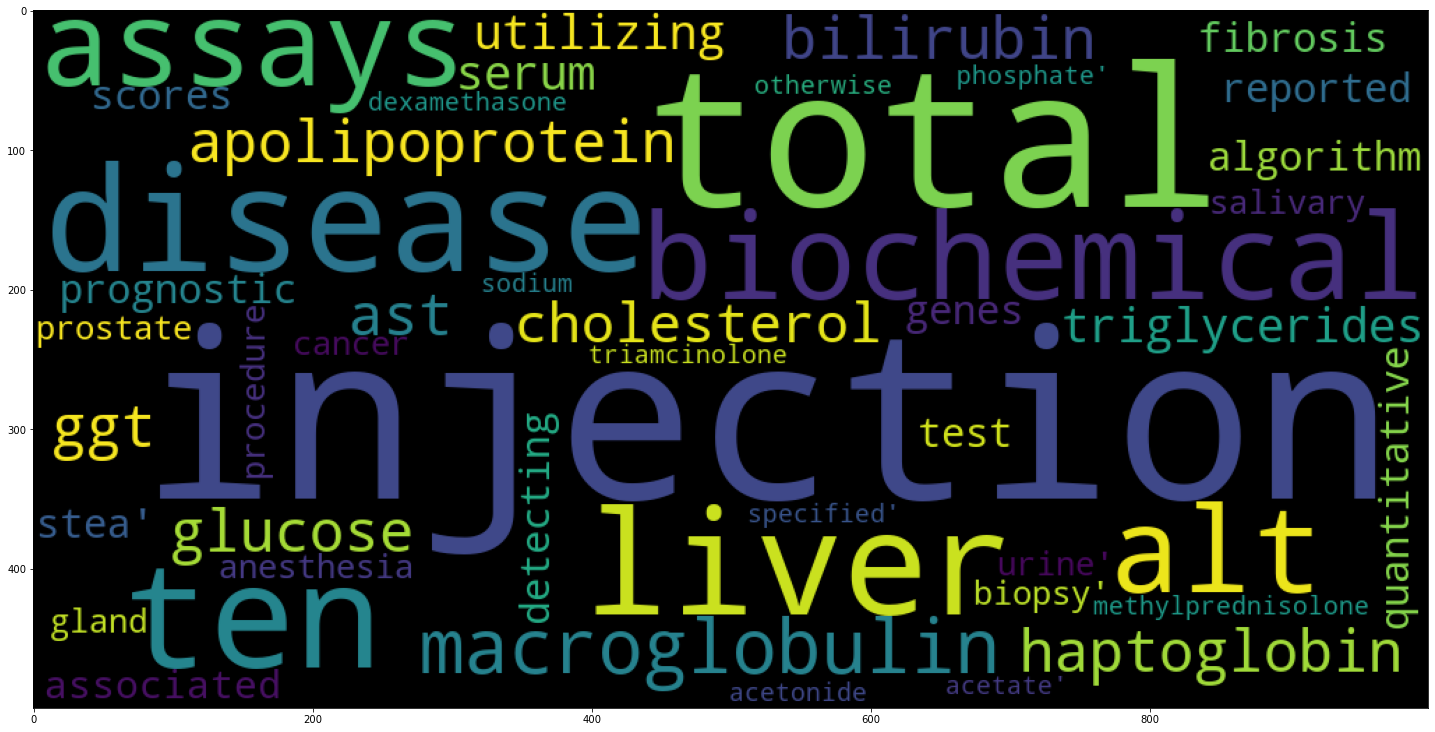

In [108]:
plt.figure(figsize=(25,15))
plt.imshow(wordcloud)
plt.show()

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer =  CountVectorizer(stop_words=stop_words,max_features=300)

In [110]:
v = vectorizer.fit_transform(textwords)

In [111]:
nlpdata =pd.DataFrame(v.toarray(),columns=vectorizer.vocabulary_)

In [112]:
nlpdata

,liver,total,test,prostate,cancer,urine,anesthesia,procedure,gland,biopsy,...,observation,programming,qualified,professional,nursing,facility,typically,office,initial,subsequent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
nlp = pd.concat([combinedf,nlpdata],axis=1)

In [114]:
yy = nlp.Avg_Mdcr_Alowd_Amt
XX = nlp.drop(['Avg_Mdcr_Pymt_Amt','Avg_Mdcr_Stdzd_Amt','Avg_Mdcr_Alowd_Amt'],axis=1)

In [115]:
yy.shape

(273211,)

In [116]:
XX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273211 entries, 0 to 273210
Columns: 312 entries, Rndrng_Prvdr_Geo_Lvl to subsequent
dtypes: float64(2), int32(10), int64(300)
memory usage: 639.9 MB


### Linear Regression NLP : without Logarithmic Transformation of "y" 

In [117]:
nlplrmodel = lr.fit(XX,yy)

In [119]:
nlplrmodel.score(XX,yy)

0.6610332158046661

In [120]:
cross_val_score(nlplrmodel,XX,yy)

array([-1.39614197e+10,  6.57195537e-01,  7.05752156e-01,  6.24792295e-01,
        6.07550910e-01])

In [121]:
np.mean([-1.39614197e+10,  6.57195537e-01,  7.05752156e-01,  6.24792295e-01,
        6.07550910e-01])

-2792283939.480942

In [122]:
nlplrpredict = nlplrmodel.predict(XX)

In [123]:
nlplr_residuals = yy - nlplrpredict

In [125]:
np.sqrt(np.mean(nlplr_residuals)**2)

2.2571577446855552e-13

### Linear Regression (NLP) : with Logarithmic Transformation of "y" 

In [126]:
nlploglr = lr.fit(XX,np.log(yy))

In [127]:
nlploglr.score(XX,np.log(yy))

0.6824995832710767

In [128]:
cross_val_score(nlploglr,XX,np.log(yy))

array([-8.43775830e+11,  6.86952200e-01,  6.85028534e-01,  6.80650962e-01,
        6.70938501e-01])

In [129]:
np.mean([-8.43775830e+11,  6.86952200e-01,  6.85028534e-01,  6.80650962e-01,
        6.70938501e-01])

-168755165999.45526

In [130]:
nlploglr_predict = nlploglr.predict(XX)

In [131]:
nlploglr_predict = np.exp(nlploglr_predict)

In [132]:
np.sqrt(np.mean(nlploglr_predict)**2)

1720847.7804229876

###  Regression using Decision Tree (NLP) : without Logarithmic Transformation of "y" 

In [134]:
nlptreemodel = tree.fit(XX,yy)

In [135]:
nlptreemodel.score(XX,yy)

0.9670917829277247

In [136]:
cross_val_score(nlptreemodel,XX,yy)

array([0.83354744, 0.9324463 , 0.93043346, 0.92167038, 0.88875684])

In [137]:
np.mean([0.83354744, 0.9324463 , 0.93043346, 0.92167038, 0.88875684])

0.901370884

In [138]:
nlptree_pred = nlptreemodel.predict(XX)

In [139]:
nlptree_residuals = yy - nlptree_pred

In [140]:
np.sqrt(np.mean(nlptree_residuals)**2)

2.3316378042609578e-15

###  Regression using Decision Tree (NLP) : with Logarithmic Transformation of "y" 

In [144]:
nlplogtreemodel = tree.fit(XX,np.log(yy))

In [145]:
nlplogtreemodel.score(XX,np.log(yy))

0.9559956522063853

In [146]:
cross_val_score(nlplogtreemodel,XX,np.log(yy))

array([0.92228801, 0.94335562, 0.94273744, 0.9409189 , 0.91856115])

In [147]:
np.mean([0.92228801, 0.94335562, 0.94273744, 0.9409189 , 0.91856115])

0.9335722240000001

In [152]:
nlplogtreepred = nlplogtreemodel.predict(XX)

In [153]:
nlplogtreepred = np.exp(nlplogtreepred)

In [154]:
nlplogtree_residuals = yy  - nlplogtreepred

In [155]:
np.sqrt(np.mean(nlplogtree_residuals)**2)

14.892616713933624

###  Regression using Random Forest (NLP) : without Logarithmic Transformation of "y" 

In [156]:
nlprfmodel = rf.fit(XX,yy)

In [157]:
nlprfmodel.score(XX,yy)

0.9662997919723021

In [158]:
cross_val_score(nlprfmodel,XX,yy)

array([0.8943859 , 0.91551807, 0.93545621, 0.92663275, 0.92223331])

In [159]:
np.mean([0.8943859 , 0.91551807, 0.93545621, 0.92663275, 0.92223331])

0.918845248

In [160]:
nlprfpred = nlprfmodel.predict(XX)

In [161]:
nlprf_residuals = yy - nlprfpred

In [162]:
np.sqrt(np.mean(nlprf_residuals)**2)


0.05365241432249152

###  Regression using Random Forest (NLP) : with Logarithmic Transformation of "y" 


In [164]:
nlprf_logmodel = rf.fit(XX,np.log(yy))

In [165]:
nlprfmodel.score(XX,np.log(yy))

0.9591542079646755

In [166]:
cross_val_score(nlprf_logmodel,XX,np.log(yy))

array([0.93956067, 0.95275459, 0.95100454, 0.95025972, 0.93124574])

In [167]:
np.mean([0.93956067, 0.95275459, 0.95100454, 0.95025972, 0.93124574])

0.9449650519999999

In [168]:
nlprfmodel_logpredict = nlprfmodel.predict(XX)

In [169]:
nlprfmodel_logpredict = np.exp(nlprfmodel_logpredict)

In [170]:
nlprfmodel_logresiduals = yy - nlprfmodel_logpredict

In [171]:
np.sqrt(np.mean(nlprfmodel_logresiduals)**2)

20.057847115692468

###  Regression using Gradient Boosting Algorithm (NLP) : without Logarithmic Transformation of "y" 

In [172]:
gbmodel_nlp = gb.fit(XX,yy)

In [173]:
gbmodel_nlp.score(XX,yy)

0.9322951915569566

In [174]:
cross_val_score(gbmodel_nlp,XX,yy)

array([0.83953876, 0.89329376, 0.90079019, 0.91586334, 0.86720945])

In [175]:
np.mean([0.83953876, 0.89329376, 0.90079019, 0.91586334, 0.86720945])

0.8833391

In [176]:
gbmodel_nlppred = gbmodel_nlp.predict(XX)

In [177]:
gbmnlp_residuals = yy - gbmodel_nlppred

In [178]:
np.sqrt(np.mean(gbmnlp_residuals)**2)

5.210692674794152e-15

###  Regression using Gradient Boosting Algorithm : with Logarithmic Transformation of "y" 

In [179]:
gbmodellog_nlp = gb.fit(XX,np.log(yy))

In [180]:
gbmodellog_nlp.score(XX,np.log(yy))

0.929729348476756

In [181]:
 cross_val_score(gbmodellog_nlp,XX,np.log(yy))

array([0.91633054, 0.92904561, 0.92908295, 0.92628378, 0.90448407])

In [182]:
np.mean([0.91633054, 0.92904561, 0.92908295, 0.92628378, 0.90448407])

0.92104539

In [187]:
gblogpredict = gbmodellog_nlp.predict(XX)

In [188]:
gblogpredict = np.exp(gblogpredict)

In [189]:
gblog_residuals = yy - gblogpredict

In [190]:
np.sqrt(np.mean(gblog_residuals)**2)

32.25889769804512

# Model Performance Metrics:

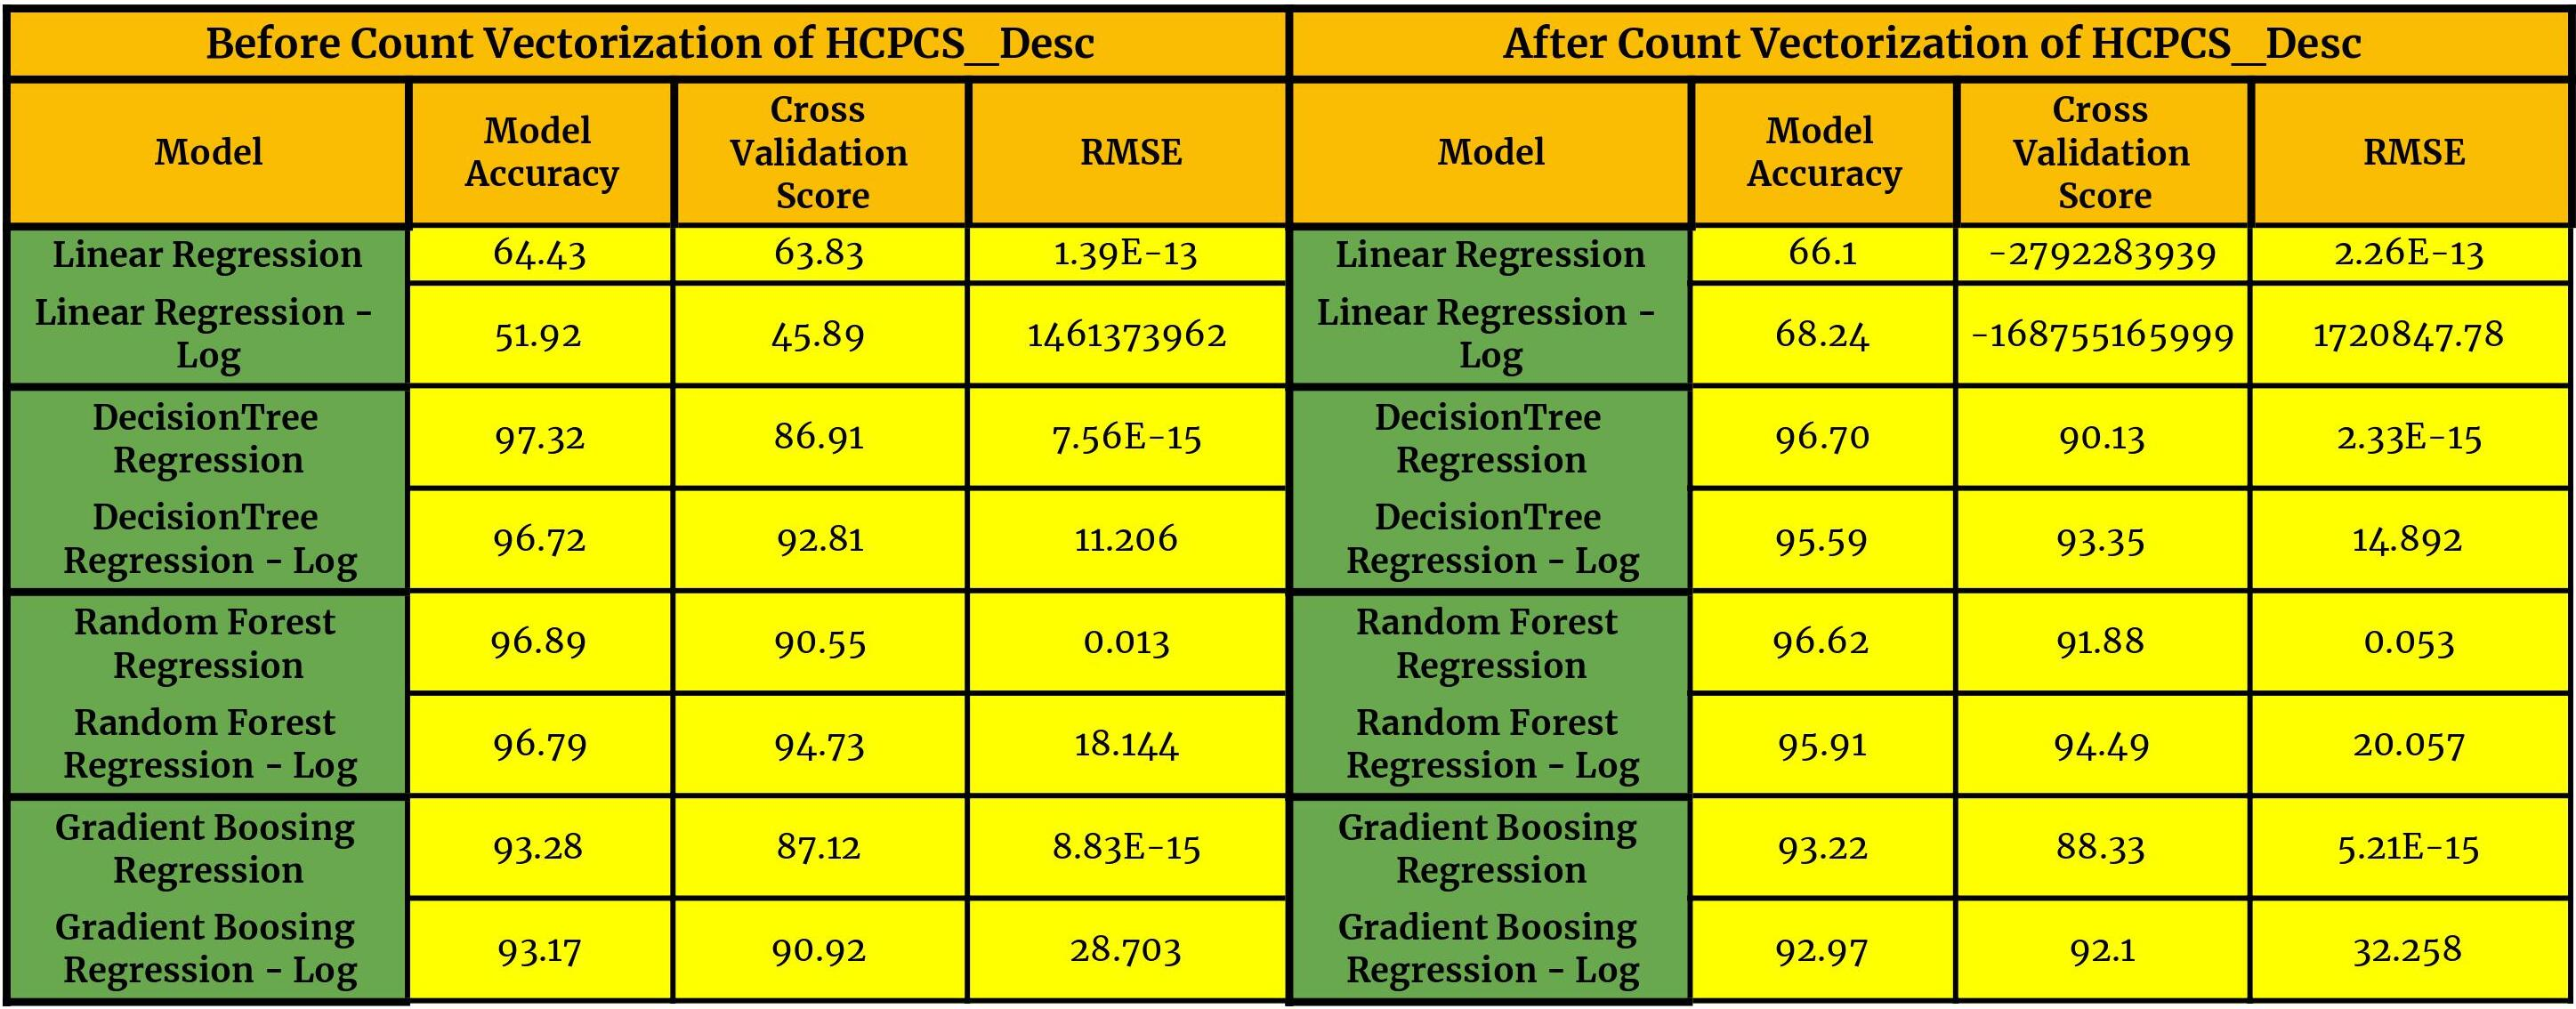

# Conclusion: 

* Gradient Boosting Model (n_estimators = 300) has the highest accuracy compared to all other models.

 
* There is high impact of Logarthmic Transformation on RMMSE.


* The Model accuracy has improved by 1.21 percent and The RMSE has improved relatively little after NLP.
